In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('student_habits_performance.csv')
print(df.head())
print(df.describe())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

In [6]:
numeric_columns = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage','sleep_hours','mental_health_rating' ,'exercise_frequency', 'exam_score']
print("Average and Variance")
for col in numeric_columns:
    mean = df[col].mean()
    var = df[col].var()
    print(f"{col}: Mean = {mean:.2f}, Variance = {var:.2f}")

Average and Variance
study_hours_per_day: Mean = 3.55, Variance = 2.16
social_media_hours: Mean = 2.51, Variance = 1.37
netflix_hours: Mean = 1.82, Variance = 1.16
attendance_percentage: Mean = 84.13, Variance = 88.35
sleep_hours: Mean = 6.47, Variance = 1.50
mental_health_rating: Mean = 5.44, Variance = 8.11
exercise_frequency: Mean = 3.04, Variance = 4.10
exam_score: Mean = 69.60, Variance = 285.22


score_range
0–30       11
31–40      31
41–60     240
61–80     442
81–100    276
Name: count, dtype: int64


Text(0.5, 1.0, 'Exam Scores Distributions')

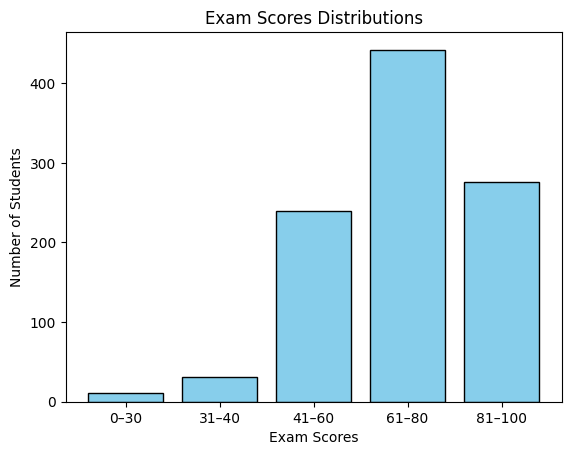

In [37]:
bins = [0,30,40, 60, 80, 100]
labels = ['0–30', '31–40', '41–60', '61–80', '81–100'] #the 
df['score_range'] = pd.cut(df['exam_score'], bins=bins, labels=labels, right=True, include_lowest=True)
frequency = df['score_range'].value_counts().sort_index()
print(frequency)
plt.bar(frequency.index, frequency.values, color='skyblue', edgecolor='black')
plt.ylabel("Number of Students")
plt.xlabel("Exam Scores")
plt.title("Exam Scores Distributions")
#plt.show()

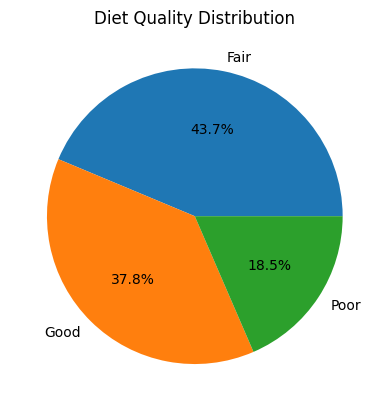

In [28]:
diet_counts = df['diet_quality'].value_counts()
plt.pie(diet_counts, labels=diet_counts.index, autopct='%1.1f%%')
plt.title('Diet Quality Distribution')
plt.show()

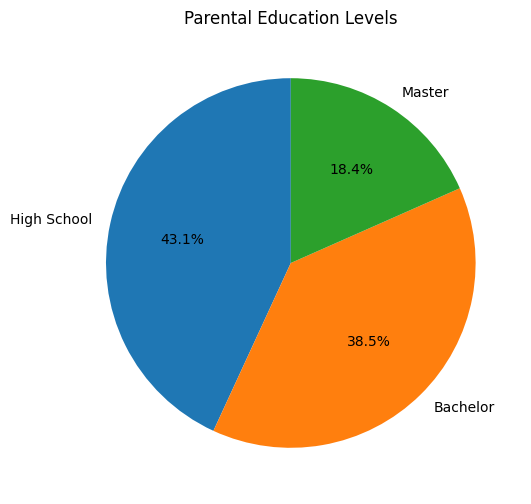

In [34]:
parent_edu_counts = df['parental_education_level'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(parent_edu_counts, labels=parent_edu_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Parental Education Levels')
plt.show()

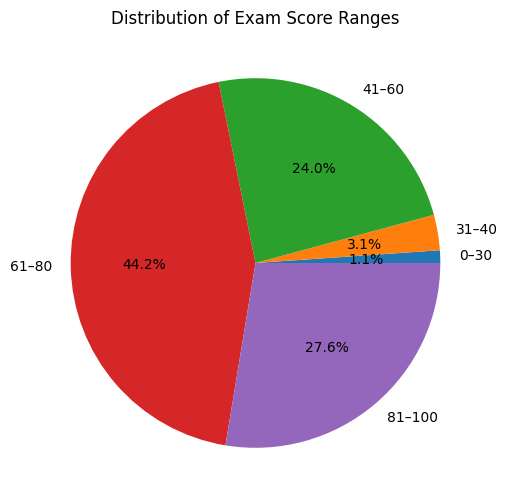

In [36]:
bins = [0, 30, 40, 60, 80, 100]
labels = ['0–30', '31–40', '41–60', '61–80', '81–100']

# Categorize scores
df['score_range'] = pd.cut(df['exam_score'], bins=bins, labels=labels, include_lowest=True)

# Count frequencies
score_counts = df['score_range'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,6))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Exam Score Ranges')
plt.show()

In [29]:
mid_points = [20, 50, 70, 90]
weighted_mean = np.average(mid_points, weights=freq)
squared_diff = [(x - weighted_mean) ** 2 for x in mid_points]
weighted_var = np.average(squared_diff, weights=freq)

print(f"\nFrequency-based Mean = {weighted_mean:.2f}, Variance = {weighted_var:.2f}")


Frequency-based Mean = 68.62, Variance = 309.50


In [30]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

sample_mean = train_df['exam_score'].mean()
sample_std = train_df['exam_score'].std()
n = len(train_df)
# 95% confidence interval
conf_interval = stats.t.interval(0.95, df=n-1, loc=sample_mean, scale=sample_std/np.sqrt(n))
print(f"\n95% Confidence Interval for Mean: {conf_interval}")

# 95% Tolerance Interval (approximate method)
tolerance_interval = (sample_mean - 2*sample_std, sample_mean + 2*sample_std)
print(f"95% Tolerance Interval: {tolerance_interval}")

# Validate with 20% test data
within_interval = test_df['exam_score'].between(*tolerance_interval).mean()
print(f"Percentage of test data within tolerance interval: {within_interval*100:.2f}%")


95% Confidence Interval for Mean: (np.float64(68.64110486609184), np.float64(71.01364513390814))
95% Tolerance Interval: (np.float64(35.64107318952558), np.float64(104.01367681047441))
Percentage of test data within tolerance interval: 97.50%


In [32]:
group = df[df['study_hours_per_day'] > 5]
group_mean = group['exam_score'].mean()
print(f"\nHypothesis Test: Mean score for students with >5 study hours = {group_mean:.2f}")
if group_mean > 80:
    print("✅ Hypothesis Supported")
else:
    print("❌ Hypothesis Not Supported")


Hypothesis Test: Mean score for students with >5 study hours = 90.79
✅ Hypothesis Supported
